In [13]:
import numpy as np
import matplotlib.pyplot as plt 

In [126]:
class KmeansClustring:
    def __init__(self,k=3,max_iteration=200):
        self.k=k
        self.centroids=None
        self.max_iteration=max_iteration
    

    def fit(self,X):
        self.centroids= np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),#the boundery of the minimum and the maximum value se have
                                          size=(self.k, X.shape[1])#how many centroids we wanna have 
                                          )#generating a random centroid that closer to dimesions we have
        
        for _ in range(self.max_iteration):
            y=[]
            for data_point in X:
                distances=self.euclidean_distance(data_point)#list of numbers
                cluster_num=np.argmin(distances)# to know which centroid is the minumum 
                y.append(cluster_num)
                
            y=np.array(y)
            cluster_indices=[]
            
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y==i))
            cluster_centers=[]
            
            for i,indices in enumerate(cluster_indices):
                if len(indices)==0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices],axis=0)[0])
            
            if np.max(self.centroids-np.array(cluster_centers))<0.0001:
                break
            else:
                self.centroids=np.array(cluster_centers)
        return y
    def euclidean_distance(self,data_point):
    
        return np.sqrt(np.sum((self.centroids-data_point)**2,axis=1))#and output will be of size (n,)
    
    def calculate_inertia(self, data,labels):
        inertia = 0
        for i, centroid in enumerate(self.centroids):
            inertia += np.sum((data[np.array(labels) == i] - centroid)**2)
        return inertia
    def elbow_method(data, max_clusters=10):
        distortions = []

        for k in range(1, max_clusters + 1):
            kmeans_custom = KmeansClustring(k=k, max_iteration=200)
            labels_custom = kmeans_custom.fit(data)
            distortion = kmeans_custom.calculate_inertia(data, labels_custom)
            distortions.append(distortion)

        plt.plot(range(1, max_clusters + 1), distortions, marker='o')
        plt.title('Elbow Method (Custom Implementation)')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Sum of Squared Distances')
        plt.show()
                    


In [127]:
from sklearn.datasets import make_blobs
data=make_blobs(n_samples=200,n_features=2,centers=8,cluster_std=2.75)
random_points=data[0]

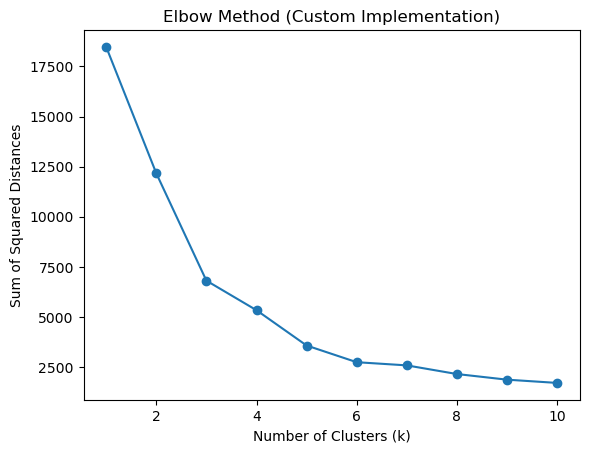

In [128]:
elbow_method(random_points)


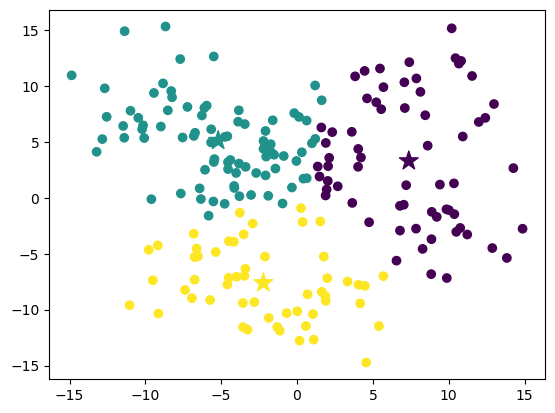

In [129]:

Kmeans=KmeansClustring(k=3)
labels=Kmeans.fit(random_points)
plt.scatter(random_points[:,0],random_points[:,1],c=labels)
plt.scatter(Kmeans.centroids[:,0], Kmeans.centroids[:,1], c=range(len(Kmeans.centroids)), marker="*", s=200)

plt.show()
